In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [24]:
df = pd.read_csv('df_superlimpiooo.csv', index_col= 0)
df.sample(10)

,age,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,remotework
employeenumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,46,No,NaN,638.0,1,3,medical,3,Male,40,2,3,healthcare representative,1,married,NaN,3142,2,Yes,13,3.0,3,1,21.0,5,2.0,10,9,5,NaN,1977,No
"1587,0",35,No,travel rarely,NaN,10,4,NaN,1,Female,51,3,2,healthcare representative,3,single,NaN,4223,3,Yes,16,3.0,3,0,NaN,4,3.0,5,0,4,NaN,1988,Yes
"1037,0",26,Yes,non travel,265.0,29,2,medical,2,Male,79,1,2,sales executive,1,single,49690.0,21813,8,No,18,3.0,4,0,NaN,6,3.0,2,2,2,4969.0,1997,Yes
"478,0",21,Yes,NaN,756.0,1,1,NaN,1,Female,99,2,1,sales representative,2,single,21740.0,9150,1,NaN,11,3.0,3,0,3.0,3,3.0,3,1,2,2174.0,2002,No
"1564,0",35,No,travel rarely,992.0,1,3,NaN,4,Male,68,2,1,laboratory technician,1,NaN,NaN,21731,1,No,19,3.0,2,0,NaN,3,3.0,3,1,2,NaN,1988,No
NaN,55,No,travel rarely,685.0,23,5,marketing,3,Male,60,2,5,manager,4,NaN,195860.0,23037,1,No,21,4.0,3,1,36.0,3,3.0,36,2,13,19586.0,1968,Yes
"893,0",38,No,travel rarely,395.0,9,3,marketing,2,Male,98,2,1,sales representative,2,NaN,28990.0,12102,0,NaN,19,3.0,4,1,3.0,3,3.0,2,1,2,2899.0,1985,Yes
"793,0",29,No,NaN,657.0,27,3,medical,2,Female,66,3,2,healthcare representative,3,married,43350.0,25549,4,No,12,3.0,1,1,11.0,3,2.0,8,1,1,4335.0,1994,Yes
"347,0",42,No,NaN,916.0,17,2,NaN,4,Female,82,4,2,research scientist,1,single,NaN,23016,3,Yes,13,3.0,3,0,NaN,1,3.0,3,0,2,NaN,1981,Yes


In [5]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['dailyrate', 'monthlyincome', 'performancerating', 'totalworkingyears',
       'worklifebalance', 'sameasmonthlyincome'],
      dtype='object')


In [9]:
#funcion para calcular el porcentaje de valores nulos en las variables categoricas
def calcular_porcentaje_nulos(df, columnas_categoricas):
    porcentaje_nulos = {}
    for columna in columnas_categoricas:
        # Calcular el número de valores nulos
        nulos = df[columna].isnull().sum()
        # Calcular el porcentaje de valores nulos
        porcentaje = (nulos / len(df)) * 100
        # Guardar el resultado en el diccionario
        porcentaje_nulos[columna] = porcentaje
    return porcentaje_nulos

In [62]:
# Lista de columnas categóricas
columnas_categoricas = ['dailyrate', 'worklifebalance', 'performancerating', 'totalworkingyears', 'monthlyincome','sameasmonthlyincome']

In [63]:
porcentajes_nulos = calcular_porcentaje_nulos(df, columnas_categoricas)

for columna, porcentaje in porcentajes_nulos.items():
    print(f"{columna}: {porcentaje:.2f}%")

dailyrate: 7.68%
worklifebalance: 6.69%
performancerating: 12.08%
totalworkingyears: 32.59%
monthlyincome: 52.23%
sameasmonthlyincome: 52.23%


In [67]:
# Lista de columnas específicas de interés
columnas_especificas = ['dailyrate', 'worklifebalance', 'performancerating', 'totalworkingyears', 'monthlyincome','sameasmonthlyincome']

# Asegurarse de que las columnas existen en el DataFrame
columnas_especificas = [col for col in columnas_especificas if col in df.columns]

# Mostrar la mediana y la media para cada columna específica
for col in columnas_especificas:
    print(f"Mediana y Media para la columna {col.upper()}:")
    mediana = df[col].median()
    media = df[col].mean()
    print(f"Mediana: {mediana}")
    print(f"Media: {media}")
    print("........................")


Mediana y Media para la columna DAILYRATE:
Mediana: 798.0
Media: 802.0852348993288
........................
Mediana y Media para la columna WORKLIFEBALANCE:
Mediana: 3.0
Media: 2.759628154050465
........................
Mediana y Media para la columna PERFORMANCERATING:
Mediana: 3.0
Media: 3.150810429880197
........................
Mediana y Media para la columna TOTALWORKINGYEARS:
Mediana: 10.0
Media: 11.318933823529411
........................
Mediana y Media para la columna MONTHLYINCOME:
Mediana: 48590.0
Media: 64776.86121919585
........................
Mediana y Media para la columna SAMEASMONTHLYINCOME:
Mediana: 4859.0
Media: 6477.686121919585
........................


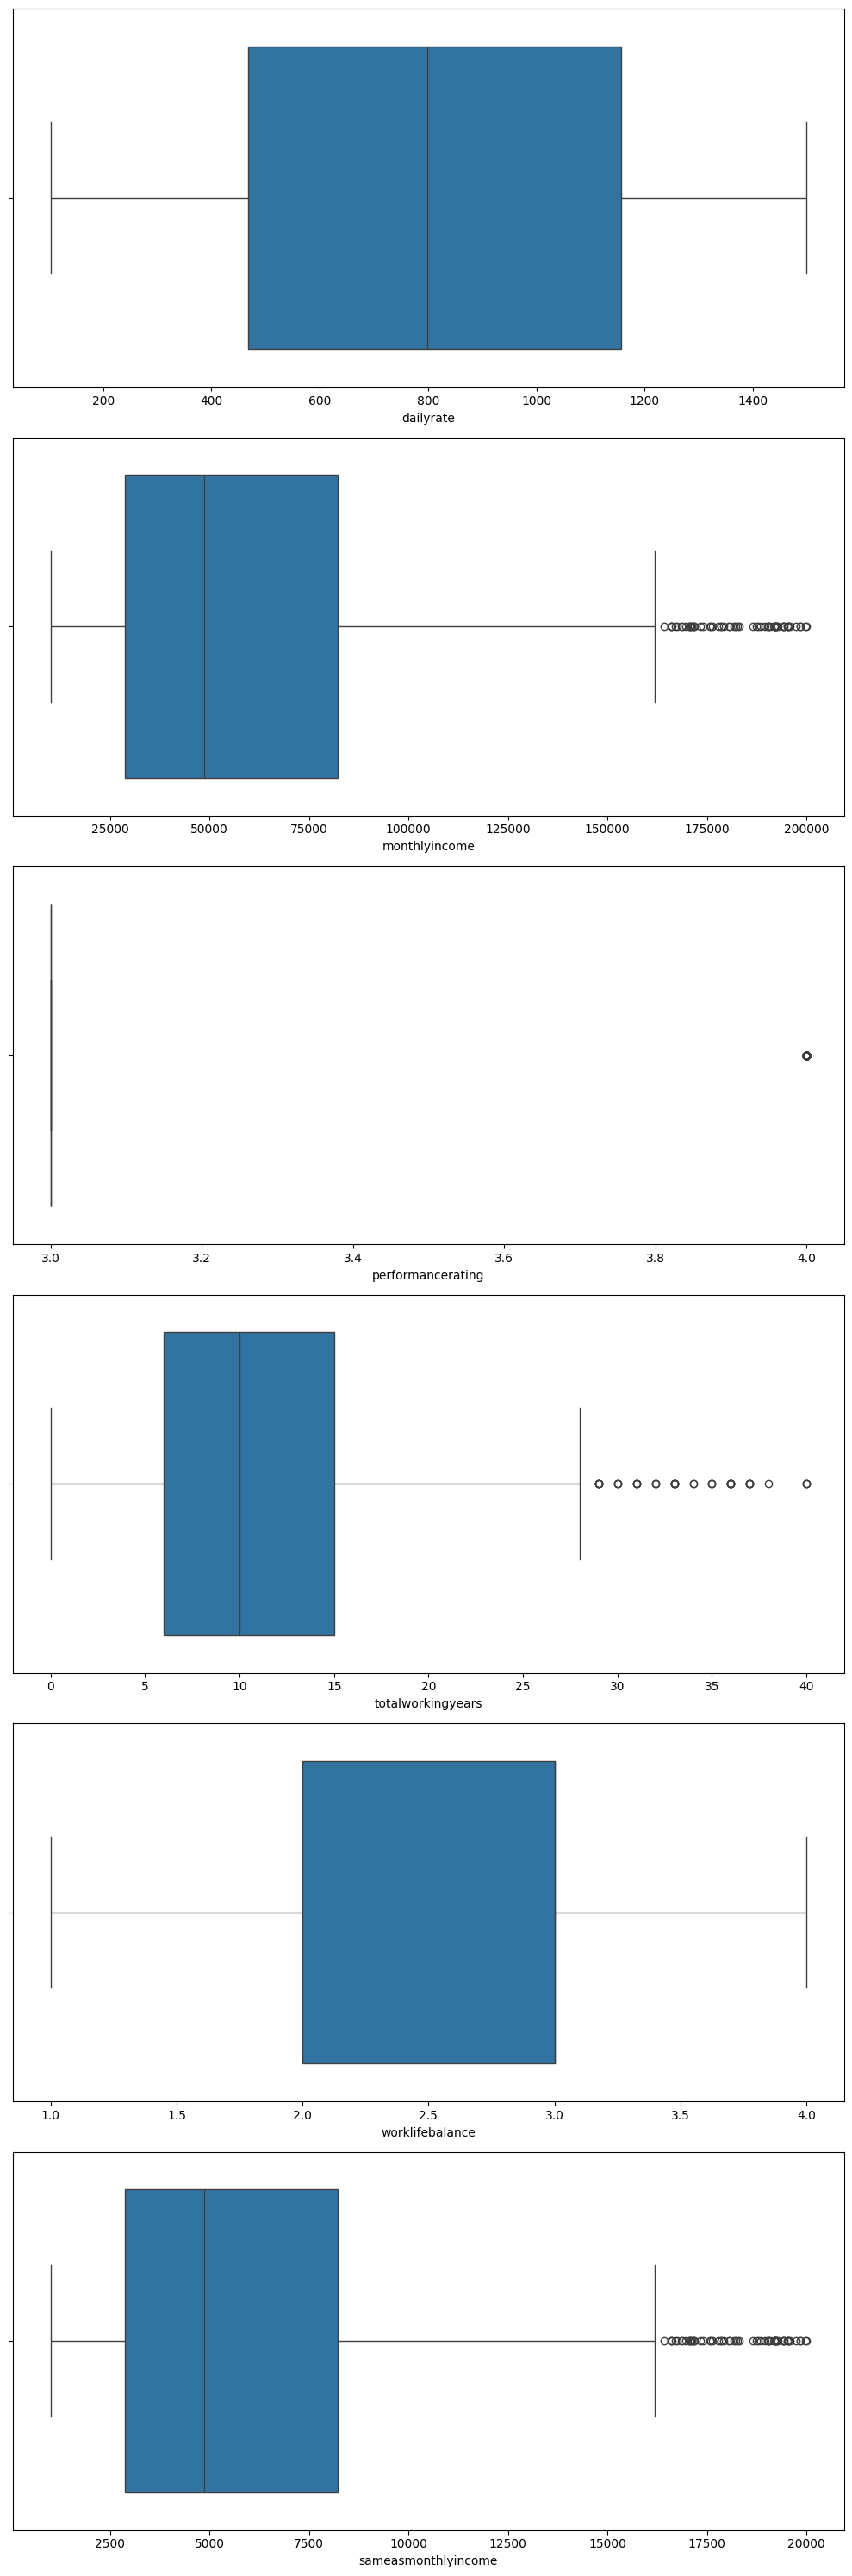

In [65]:
# Crear gráficos de caja para las columnas numéricas con valores nulos
fig, axes = plt.subplots(nrows=len(nulos_esta_num), ncols=1, figsize=(10, 5*len(nulos_esta_num)))
axes = axes.flatten()

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x=col, data=df, ax=axes[indice])

plt.tight_layout()
plt.show()


#### Reviso mis tres columnas

In [30]:
df['dailyrate'].isnull().sum()

124

In [45]:
df['dailyrate'].unique()

array([ 684.,  699.,  532.,  359., 1319.,  117., 1435.,  635., 1276.,
        840.,  247., 1369.,  201., 1360.,  692., 1398.,  286., 1402.,
        819.,  884., 1238.,  515., 1223.,  202.,  928.,  607.,  266.,
        429.,  589.,   nan, 1180., 1282.,  776.,  665.,  526., 1034.,
       1403., 1499.,  580.,  859.,  263., 1376.,  885., 1003., 1321.,
        394., 1372., 1333.,  228.,  737.,  823.,  667.,  301.,  573.,
       1329.,  630., 1063., 1017., 1296.,  939., 1355., 1448.,  200.,
       1202.,  404.,  208.,  813.,  465., 1189., 1001., 1394.,  161.,
        288.,  682., 1354.,  147.,  119., 1413.,  452.,  334., 1132.,
        982.,  480., 1099.,  672., 1379.,  583., 1492., 1050.,  469.,
        237., 1440., 1291., 1157., 1336., 1224.,  735., 1389.,  638.,
       1240.,  194., 1339.,  111., 1469.,  470., 1232., 1249.,  798.,
        549.,  570.,  541.,  164., 1117.,  619.,  319.,  956., 1245.,
       1397.,  527.,  213.,  882.,  330.,  406.,  217.,  481.,  669.,
       1465.,  685.,

------

In [40]:
df['performancerating'].isnull().sum()

195

In [44]:
df['performancerating'].unique()

array([ 3.,  4., nan])

In [52]:
df['performancerating'].value_counts()

performancerating
3.0    1205
4.0     214
Name: count, dtype: int64

------

In [41]:
df['worklifebalance'].isnull().sum()

108

In [43]:
df['worklifebalance'].unique()

array([ 3., nan,  2.,  4.,  1.])

In [51]:
df['worklifebalance'].value_counts()

worklifebalance
3.0    913
2.0    359
4.0    155
1.0     79
Name: count, dtype: int64

#### `Cambio los nulos por la media porque no tienen valores atipicos`

In [69]:
# Lista de columnas específicas de interés
columnas_3 = ['dailyrate', 'worklifebalance', 'performancerating']

# Asegurarse de que las columnas existen en el DataFrame
columnas_3 = [col for col in columnas_3 if col in df.columns]

# Calcular la media para cada columna específica y rellenar los valores nulos
for col in columnas_3:
    media = df[col].mean()
    df[col].fillna(media, inplace=True)

# Comprobar los nulos para cada columna específica
for col in columnas_3:
    print(f"Después del 'fillna' la columna {col.upper()} tiene {df[col].isnull().sum()} nulos")


Después del 'fillna' la columna DAILYRATE tiene 0 nulos
Después del 'fillna' la columna WORKLIFEBALANCE tiene 0 nulos
Después del 'fillna' la columna PERFORMANCERATING tiene 0 nulos


/var/folders/cb/k7746bq95ql69k6dhd_7nc3w0000gn/T/ipykernel_16726/4039544653.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(media, inplace=True)
